In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [11]:
tiff_path = "/mnt/jbrockma/bachelor-thesis/data/tissue/F33/CD/All_3D/object_98867_7861__4837__26_1.tif"
tiff_image = Image.open(tiff_path)

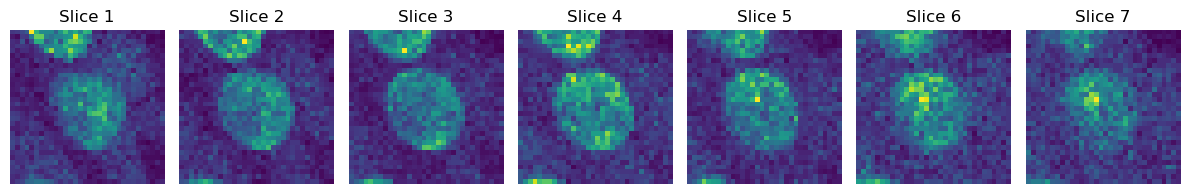

In [12]:
# Assuming the TIFF image is organized as a sequence of pages/slices
num_slices = 7

plt.figure(figsize=(12, 8))

for i in range(num_slices):
    # Extract the ith slice
    slice_image = tiff_image.seek(i)

    # Display the slice
    plt.subplot(1, num_slices, i+1)
    plt.imshow(tiff_image)
    plt.title(f"Slice {i + 1}")
    plt.axis("off")

plt.tight_layout()
plt.show()


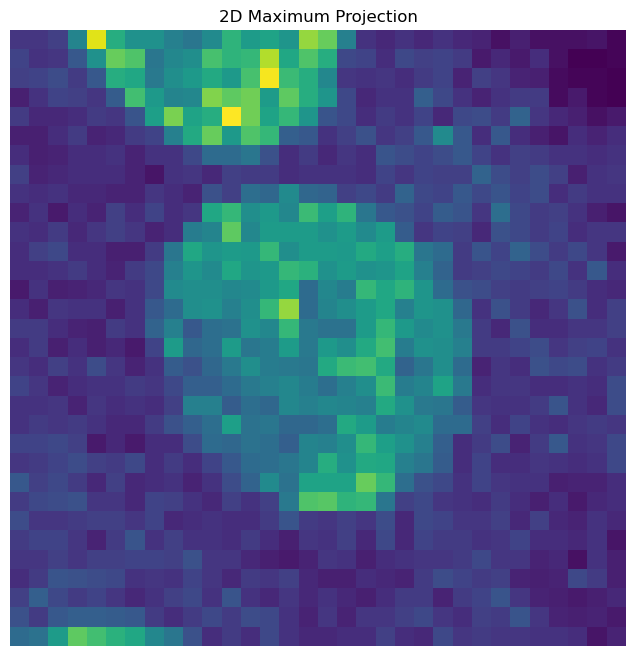

In [22]:
# Create an empty numpy array to hold the image stack
image_stack = []

# Iterate through the TIFF image to build the image stack
tiff_image.seek(0)
try:
    while True:
        image_stack.append(np.array(tiff_image))
        tiff_image.seek(tiff_image.tell() + 1)
except EOFError:
    pass

# Convert the list of arrays to a 3D numpy array
image_stack = np.array(image_stack)

# Calculate the maximum projection along the axial-axis
max_projection = np.max(image_stack, axis=0)

# Display the maximum projection
plt.figure(figsize=(8, 8))
plt.imshow(max_projection)
plt.title("2D Maximum Projection")
plt.axis("off")
plt.show()

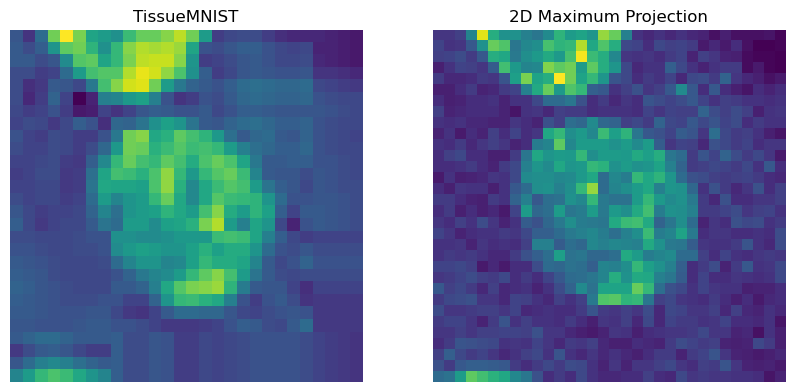

In [23]:
from pathlib import Path

tissuemnist = np.load(Path.home() / '.medmnist' / 'tissuemnist.npz')
train_ims = tissuemnist['train_images']
train_im = train_ims[152650]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

axes[0].imshow(train_im)
axes[0].set_title('TissueMNIST')
axes[0].axis('off')

axes[1].imshow(max_projection)
axes[1].set_title('2D Maximum Projection')
axes[1].axis('off')

plt.show()

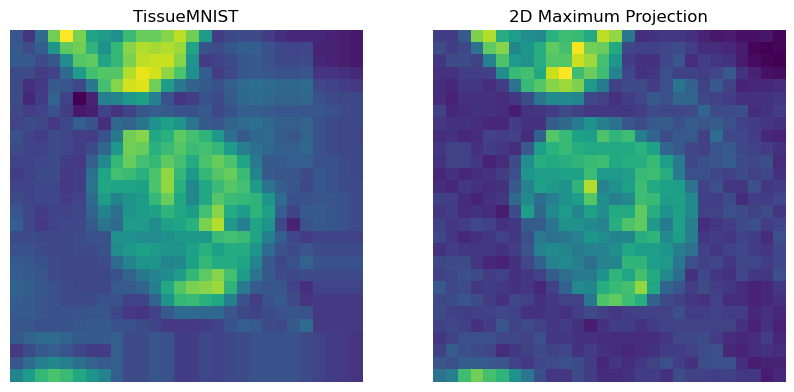

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

axes[0].imshow(train_im)
axes[0].set_title('TissueMNIST')
axes[0].axis('off')

axes[1].imshow(Image.fromarray(max_projection).resize(train_im.shape, Image.BICUBIC))
axes[1].set_title('2D Maximum Projection')
axes[1].axis('off')

plt.show()